Problem statement:- In this avocado dataset , we have many independent features (13) and (1) dependent feature  which is "AveragePrice" of avocado.Hence we need to build a machine learning regression model which can predict the Average price of avocadoes.

# Importing important dataset

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [209]:
df=pd.read_csv("avocado.csv")

In [210]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [211]:
#Dimensions of the dataset
df.shape

(18249, 14)

We can see that our dataset has 18249 rows and 14 rows.

In [212]:
#Columns of the dataset
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [213]:
df["XLarge Bags"].value_counts()

0.00        12048
3.33           29
6.67           16
1.11           15
5.00           12
            ...  
36.39           1
29342.75        1
724.83          1
7415.42         1
118.86          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [214]:
#Checking for the null values in the dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Our dataset does not contain any nan values.

In [215]:
#let us remove the unnamed column since it has not vital information for our model
df=df.drop(['Unnamed: 0'], axis = 1)

In [216]:
#Let  us see the statistical summary of our data.
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


We have three object columns in our dataset.

In [218]:
#Let us convert Date from object datatype to datetime64 Datatype
df["Date"]=pd.to_datetime(df["Date"])

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [220]:
#We are creating two new columns of Year and Month by extracting data from Date column
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [221]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,2015,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,2015,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2018,2
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,2018,1
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,2018,1
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,2018,1


In [222]:
#Lets drop the column of year and date. since we have two columns of the year.
df=df.drop(['year'], axis = 1)
df=df.drop(['Date'], axis = 1)


In [223]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Month
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,12
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,1


# Exploratory Data Analysis

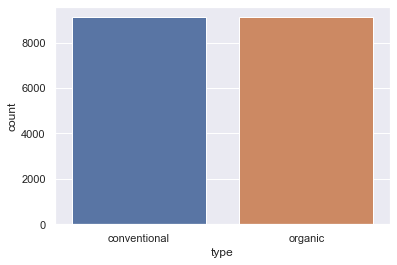

In [224]:
#Lets plot the countplot for the Type column
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="type", data=df)

In [225]:
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

We can see that  conventional and organic both are  almost same in number.

In [226]:
df["region"].value_counts()

Houston                338
Boise                  338
BaltimoreWashington    338
Seattle                338
GreatLakes             338
NewOrleansMobile       338
NorthernNewEngland     338
Louisville             338
TotalUS                338
PhoenixTucson          338
Portland               338
Orlando                338
Denver                 338
MiamiFtLauderdale      338
Chicago                338
Boston                 338
Charlotte              338
Tampa                  338
Roanoke                338
RaleighGreensboro      338
California             338
Plains                 338
Jacksonville           338
SouthCentral           338
Columbus               338
GrandRapids            338
SouthCarolina          338
Sacramento             338
SanFrancisco           338
StLouis                338
Nashville              338
CincinnatiDayton       338
Pittsburgh             338
Detroit                338
HarrisburgScranton     338
West                   338
RichmondNorfolk        338
S

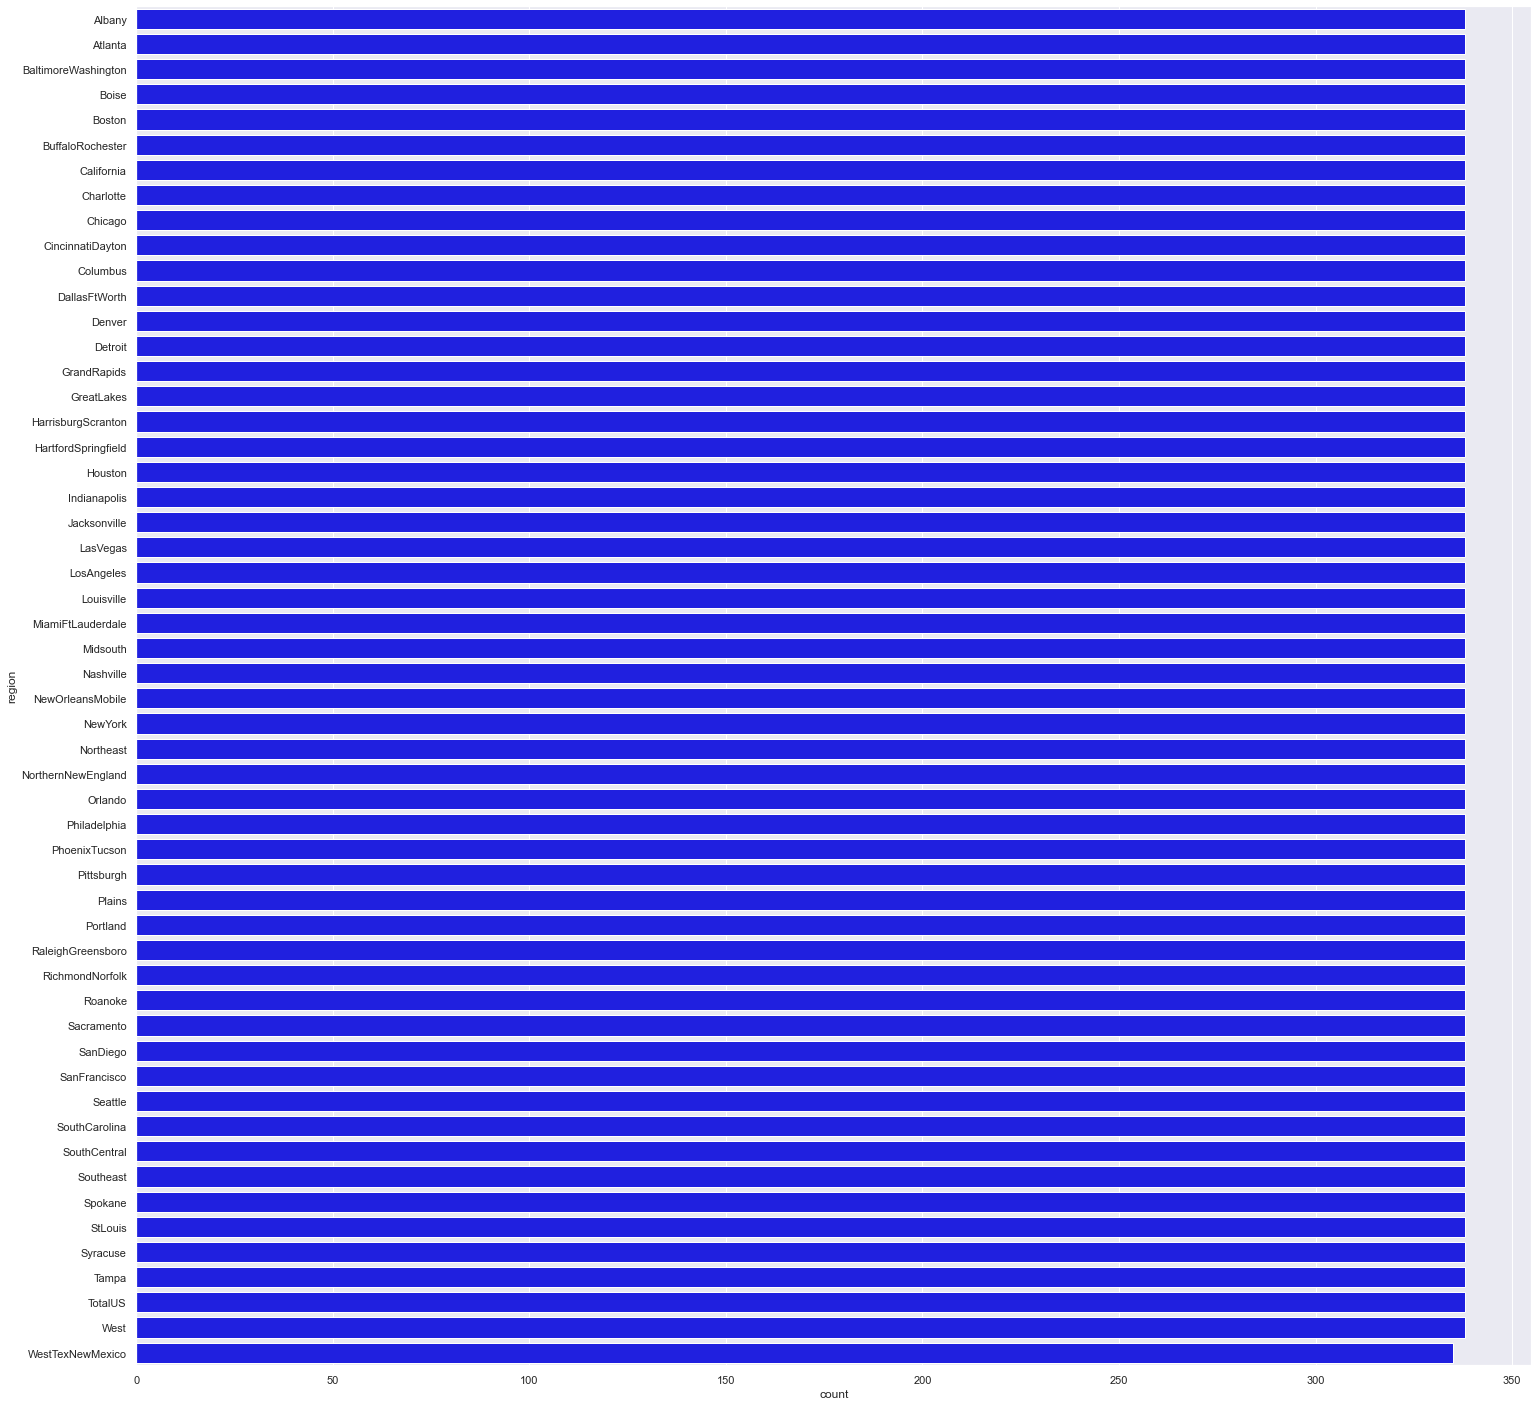

In [227]:
#Lets plot the countplot for the region column
countplt, ax = plt.subplots(figsize = (25,25))
ax = sns.countplot(y="region", data=df,color="blue")

We can see from the countplot that every region in our dataset has come equally.

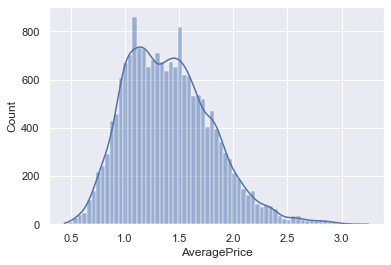

In [228]:
#Lets plot the AveragePrice normal graph
sns.histplot(data=df, x="AveragePrice", kde=True)

We can see that AveragePrice normal graph is skewed to the right.

In [229]:
#Lets groupby our dataset by region to explore it in much better way.
gr=df.groupby(['region']).mean()
gr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,Month
region,,,,,,,,,,,
Albany,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929,6.177515
Atlanta,1.337959,2.621453e+05,1.461169e+05,3.121851e+04,311.385769,8.449856e+04,5.160573e+04,3.207004e+04,822.786036,2016.147929,6.177515
BaltimoreWashington,1.534231,3.985619e+05,3.565622e+04,2.459829e+05,12466.730976,1.044561e+05,1.009397e+05,2.903985e+03,612.382722,2016.147929,6.177515
Boise,1.348136,4.264257e+04,2.001951e+04,3.461682e+03,3186.787840,1.597459e+04,1.384004e+04,2.103634e+03,30.915207,2016.147929,6.177515
Boston,1.530888,2.877929e+05,4.994610e+03,2.142199e+05,4982.294970,6.359609e+04,5.890659e+04,4.438365e+03,251.124231,2016.147929,6.177515
BuffaloRochester,1.516834,6.793630e+04,1.776671e+03,3.166395e+04,144.335976,3.435134e+04,3.037998e+04,3.729050e+03,242.313432,2016.147929,6.177515
California,1.395325,3.044324e+06,1.180376e+06,1.039915e+06,94204.276746,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929,2016.147929,6.177515
Charlotte,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929,6.177515
Chicago,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929,6.177515


In [230]:
maxClm = gr['AveragePrice'].max()
print("Maximum value in column 'AveragePrice': ",maxClm )

Maximum value in column 'AveragePrice':  1.8186390532544363


# We can say that maximum mean average price of avocado is in HartfordSpringfield which is	1.818639.

In [231]:
mixClm = gr['AveragePrice'].min()
print("Maximum value in column 'AveragePrice': ", mixClm )

Maximum value in column 'AveragePrice':  1.0479289940828398


# We can say that minimum mean average price of avocado is in Houston which is 1.047929.

In [232]:
#Lets groupby our dataset by Month to explore it in much better way.
g=df.groupby(['Month']).mean()
g

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year
Month,,,,,,,,,,
1,1.311019,9.035654e+05,297091.451924,328309.637593,23469.554733,254693.975550,190706.250520,61666.720267,2321.004763,2016.500000
2,1.274387,1.018825e+06,356672.920885,348558.374931,28394.881146,285196.078073,213055.035712,68894.364792,3246.677569,2016.500000
3,1.332255,8.845054e+05,305386.962173,294504.626585,24952.196558,259658.362021,201308.615027,55152.129385,3197.617609,2016.411765
4,1.374380,8.801935e+05,314698.492251,291711.817500,25904.380947,247878.811068,189665.529252,55711.218697,2502.063120,2016.076923
5,1.346601,9.727150e+05,349946.910390,336679.188056,28377.930767,257710.995238,193425.140708,61144.593591,3141.260939,2015.928571
6,1.408964,9.293397e+05,337007.417141,302172.503879,28951.149985,261208.611175,202713.415943,53218.635417,5276.559815,2015.998454
7,1.462077,8.590482e+05,292245.798466,294714.809451,24521.787639,247558.728228,193294.104643,47831.054795,6433.567467,2016.071429
8,1.512514,8.036857e+05,290614.959295,282362.133625,19615.213554,211092.107201,166253.229174,41272.813348,3566.063967,2015.923077
9,1.572654,7.533192e+05,258561.835085,275712.053642,17425.176389,201618.164769,154073.842739,45327.096898,2217.225131,2016.000000


In [233]:
maxC = g['AveragePrice'].max()
print("Maximum value in column 'AveragePrice': ",maxC)

Maximum value in column 'AveragePrice':  1.5796825396825367


# We can say that mean average price of avocado is maximum in month 10 (October) which	1.579683

In [234]:
minC = g['AveragePrice'].min()
print("Minimum value in column 'AveragePrice': ",minC)

Minimum value in column 'AveragePrice':  1.2743865740740727


# We can say that mean average price of avocado is minimum in month 2	(February) which is 1.274387

In [235]:
#Lets groupby our dataset by Year to explore it in much better way.
gt=df.groupby(['Year']).mean()
gt

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Month
Year,,,,,,,,,,
2015,1.375590,7.810274e+05,304443.451708,313633.844367,25426.962520,137523.105437,113033.429256,23520.285037,969.390611,6.518255
2016,1.338640,8.584206e+05,271567.466578,297850.478632,28468.633371,260533.986204,197025.327568,59940.587974,3568.070662,6.442308
2017,1.515128,8.623393e+05,288716.905194,269964.124350,15941.542779,287712.119423,213728.158838,69790.115367,4193.843471,6.528487
2018,1.347531,1.066928e+06,355323.868904,314628.606698,17694.903387,379271.564429,278349.820795,95358.015340,5563.728295,2.000000


# From above table we can say that "Mean average price" of avocado is maximum in year "2017"
                                

# "Mean average price " of avocado is minimum in year "2016" 

In [236]:
#Creating dummy columns for the nominal categorical variables and dropping one column from each to counter multicollinearity.
categorical_cols = ["type","region"] 
df2 = pd.get_dummies(df, columns = categorical_cols,drop_first=True)

In [237]:
df2

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,2018,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,2018,...,0,0,0,0,0,0,0,0,0,1


In [238]:
#Bifurcating the dataset into independent and dependent variables.
y=df2.iloc[:,0]
x=df2.iloc[:,1:]

# Splitting the dataset into training and test set

In [239]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [240]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

# Standard scaling the dataset

In [241]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
y_train=sc.fit_transform(y_train.reshape(-1,1))
y_test=sc.transform(y_test.reshape(-1,1))

# Training the train data on Multiple linear regression model

In [242]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [243]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, train_test_split,GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [244]:
#finding best random_state
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range (1,400):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc=r2_score(y_test,predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best r2_score is ",maxAccu,'on Random_state',maxRS)

Best r2_score is  0.6244661461217283 on Random_state 113


In [245]:
#DecisionTreeRegressor model
dtr=DecisionTreeRegressor()

dtr.fit(x_train,y_train)
ad_pred=dtr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.8047022190764805
0.03224923287671233


In [246]:
#knearest Neighbours regressor model
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
ad_pred=knr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.6613752496501626
0.055916602739726026


In [247]:
#AdaBoost Regressor model
abr=AdaBoostRegressor()

abr.fit(x_train,y_train)
ad_pred=abr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.5814483546494049
0.06911481235482338


In [248]:
#Linear Regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
ad_pred=lr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.5851281033585545
0.06850718090869026


In [249]:
#Gradient boosting model
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
ad_pred=gbr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.7423298539532213
0.042548689011951406


In [250]:
#Support vector Regressor model
svr=SVR()
svr.fit(x_train,y_train)
ad_pred=svr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.33629769308591395
0.10959617746432837


In [251]:
#RandomForest Regressor model
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
ad_pred=rfr.predict(x_test)
print(r2_score(y_test,ad_pred))
print(mean_squared_error(y_test,ad_pred))


0.9096879292330509
0.014913098284931503


In [252]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of LinearRegression model :",scr.mean())
scr=cross_val_score(gbr,x,y,cv=5)
print("Cross validation score of gradientBoostingRegression model :",scr.mean())
scr=cross_val_score(svr,x,y,cv=5)
print("Cross validation score of Support vector regression model :",scr.mean())
scr=cross_val_score(abr,x,y,cv=5)
print("Cross validation score of AdaBoostRegressor model :",scr.mean())
scr=cross_val_score(knr,x,y,cv=5)
print("Cross validation score of Knearest neighbour regressor model :",scr.mean())
scr=cross_val_score(dtr,x,y,cv=5)
print("Cross validation score of DecisionTreeRegressor model :",scr.mean())
scr=cross_val_score(rfr,x,y,cv=5)
print("Cross validation score of RandomForestRegressor model :",scr.mean())

Cross validation score of LinearRegression model : -9.419304229965599
Cross validation score of gradientBoostingRegression model : 0.3958993572640272
Cross validation score of Support vector regression model : -0.21681513394749002
Cross validation score of AdaBoostRegressor model : -0.01073042998384599
Cross validation score of Knearest neighbour regressor model : -0.20268284519221394
Cross validation score of DecisionTreeRegressor model : -0.11685645264966057
Cross validation score of RandomForestRegressor model : 0.27788984494546665


# Our best model is RandomForest Regression.

# Hyperparameter tuning

In [281]:
from sklearn.model_selection import GridSearchCV

In [282]:
parameter={ "criterion":['mse', 'mae'],}

In [283]:
GCV=GridSearchCV(RandomForestRegressor(),parameter,cv=5)
GCV.fit(x_train,y_train)

KeyboardInterrupt: 

In [ ]:
GCV.best_params_

In [ ]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [ ]:
accuracy_score(y_test,GCV_pred)

In [284]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"avocadorfr.pkl")

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'